# Testing data augmentation blur

Types of blur
- motion horizontal
- motion vertical
- Gaussian

In [53]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
import cv2
import matplotlib.pyplot as plt
import numpy as np
import json
import random
import pprint
import pandas as pd
import skimage

True
NVIDIA GeForce RTX 3090


In [8]:
with open('/media/arnau/PEN/TFG/hf_model_test_res.json', encoding='UTF-8') as jf:
    model_output_data = json.load(jf)
img_list = list(model_output_data.keys())
direcv = '/media/arnau/PEN/TFG/val/'

In [23]:
sample = direcv + img_list[10]

In [67]:
def add_motion_blur(img_name, typ, orient="h"):

    if type(img_name) == str:
        img = cv2.imread(img_name)

    if typ == "motion":
        kernel_size = 30

        kernel_v = np.zeros((kernel_size, kernel_size))
        kernel_h = np.copy(kernel_v)
        kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)
        kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
        kernel_v /= kernel_size
        kernel_h /= kernel_size

        vertical_mb = cv2.filter2D(img, -1, kernel_v)
        horizonal_mb = cv2.filter2D(img, -1, kernel_h)

        if orient == 'h':
            return horizonal_mb
        elif orient == "v":
            return vertical_mb
        
    elif typ == "gaussian":
        sigma = 6.0

        # apply Gaussian blur, creating a new image
        blurred = skimage.filters.gaussian(
            img, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)
        return blurred

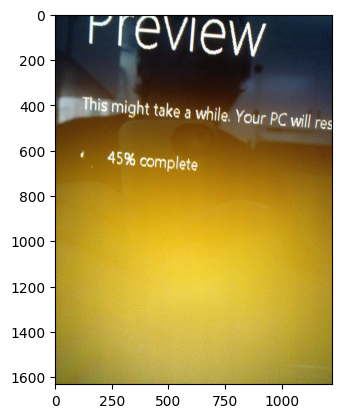

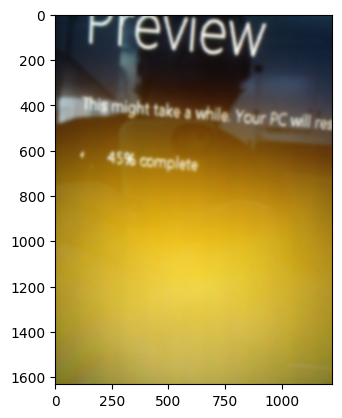

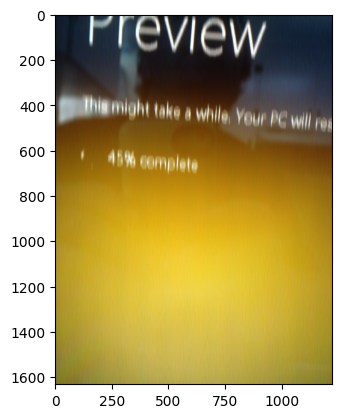

In [77]:
plt.imshow(cv2.imread(sample))
plt.show()
plt.imshow(add_motion_blur(sample, "gaussian"))
plt.show()
plt.imshow(add_motion_blur(sample, "motion", "v"))
plt.show()